In [ ]:
!pip install datasets pillow torchvision torchmetrics pytorch-fid


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 22.8 MB/s eta 0:00:00


In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-38irso0x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-38irso0x
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=05761918500db8161b1b293f0a3261d907634421bd57c12f4bd4a943db05dad8
  Stored in directory: /tmp/pip-ephem-wheel-cache-68eo5idt/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [ ]:
from diffusers import DDIMScheduler, EulerAncestralDiscreteScheduler


In [ ]:
!pip install diffusers transformers accelerate safetensors lpips pytorch-fid ftfy regex tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
import os
from PIL import Image
import pandas as pd

from diffusers import (
    StableDiffusionXLPipeline,
    EulerAncestralDiscreteScheduler,
    DDIMScheduler
)
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.enable_attention_slicing()
pipe.enable_vae_tiling()
pipe.to("cuda")


print("SDXL loaded safely!")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/pipeline_utils.py:2213: FutureWarning: `enable_vae_tiling` is deprecated and will be removed in version 0.40.0. Calling `enable_vae_tiling()` on a `StableDiffusionXLPipeline` is deprecated and this method will be removed in a future version. Please use `pipe.vae.enable_tiling()`.
  deprecate(


SDXL loaded safely!


In [ ]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.enable_attention_slicing()
pipe.enable_vae_tiling()
pipe.enable_model_cpu_offload()

print("SDXL loaded safely!")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


SDXL loaded safely!


In [ ]:
prompts = [
    "A man riding a bicycle on a city street.",
    "A dog lying on a couch next to a person.",
    "A group of people eating at an outdoor table.",
    "A cat sitting on top of a computer keyboard.",
    "A bus driving down a snowy road.",
    "A woman reading a book inside a library.",
    "A boat sailing on a lake with mountains in the background.",
    "A child holding a teddy bear on a bed.",
    "A plate of vegetables and grilled chicken.",
    "A person skiing down a snow-covered mountain.",
    "A laptop on a wooden desk next to a cup of coffee.",
    "A man cooking in a modern kitchen.",
    "A group of friends sitting around a campfire at night.",
    "A dog running across a beach during sunset.",
    "A close-up shot of a delicious chocolate cake.",
    "A woman walking a dog in a park.",
    "A busy street with cars and pedestrians.",
    "A plate of sushi with chopsticks on the side.",
    "A man standing next to a red sports car.",
    "A bird flying over a calm lake.",
    "A football player running with the ball.",
    "A family eating dinner together at home.",
    "A train passing through a rural landscape.",
    "A person painting on a canvas in an art studio.",
    "A crowded subway station during rush hour.",
    "A bowl of fruit on a kitchen counter.",
    "A young girl reading a book under a tree.",
    "A cup of coffee beside an open laptop.",
    "A bicycle parked next to a brick wall.",
    "A person swimming underwater in a pool.",
    "A man playing guitar on a stage.",
    "A chef preparing food in a restaurant kitchen.",
    "A woman taking photos with a camera.",
    "A table full of desserts at a bakery.",
    "A person hiking on a forest trail.",
    "A cat sleeping inside a cardboard box.",
    "A sunset over a tropical beach.",
    "A person holding an umbrella in the rain.",
    "A bowl of ramen on a dining table.",
    "A child playing with blocks on the floor.",
    "A man fixing a bicycle in a garage.",
    "A woman drinking water after exercise.",
    "A horse running through a field.",
    "A person standing on top of a tall mountain.",
    "A meal of pasta with tomato sauce.",
    "A penguin walking on ice.",
    "A person driving a motorcycle on a highway.",
    "A slice of pizza on a paper plate.",
    "A surfer riding a big wave in the ocean.",
    "A child holding a ball."
]

print(len(prompts))


50


In [ ]:
os.makedirs("real_images", exist_ok=True)

for i in range(20):
    arr = np.random.randint(0, 255, (512,512,3), dtype=np.uint8)
    Image.fromarray(arr).save(f"real_images/{i}.png")


In [ ]:
from transformers import CLIPModel, CLIPProcessor

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to("cuda")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def compute_clip_score(prompt, image):
    inputs = clip_processor(text=[prompt], images=image, return_tensors="pt").to("cuda")
    out = clip_model(**inputs)
    img = out.image_embeds
    txt = out.text_embeds
    return torch.cosine_similarity(img, txt).item()


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
import lpips
lpips_model = lpips.LPIPS(net='alex').to("cuda")

def pil_to_tensor(image):

    arr = np.array(image).astype(np.float32) / 255.0
    arr = arr * 2 - 1
    tensor = torch.tensor(arr).permute(2, 0, 1).unsqueeze(0)
    return tensor

def compute_lpips(img1, img2):
    t1 = pil_to_tensor(img1).to("cuda")
    t2 = pil_to_tensor(img2).to("cuda")
    return lpips_model(t1, t2).item()


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 145MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
samplers = {
    "ddim": DDIMScheduler.from_config(pipe.scheduler.config),
    "euler_a": EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
}

steps_list = [10, 20, 30]
guidance_list = [5.0, 7.5, 12.0]


In [ ]:
!zip -r run1.zip generated/RUN1_ddim_15_5.0 generated/RUN1_ddim_15_7.5 results_run1.csv


  adding: generated/RUN1_ddim_15_5.0/ (stored 0%)
  adding: generated/RUN1_ddim_15_5.0/20.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/27.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/47.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/32.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/26.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/9.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/7.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/30.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/24.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/35.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/41.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/45.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/25.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/4.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/33.png (deflated 0%)
  adding: generated/RUN1_ddim_15_5.0/19.png (deflated 0%)
  adding: generated/RUN1_

In [ ]:
from google.colab import files
files.download("run1.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import lpips
lpips_model = lpips.LPIPS(net='alex').to("cuda")

def pil_to_tensor(image):
    import numpy as np
    import torch
    arr = np.array(image).astype(np.float32) / 255.0
    arr = arr * 2 - 1
    tensor = torch.tensor(arr).permute(2, 0, 1).unsqueeze(0)
    return tensor

def compute_lpips(img1, img2):
    t1 = pil_to_tensor(img1).to("cuda")
    t2 = pil_to_tensor(img2).to("cuda")
    return lpips_model(t1, t2).item()


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
!zip -r runs_and_reals.zip generated real_images


  adding: generated/ (stored 0%)
  adding: generated/RUN2_ddim_30_7.5/ (stored 0%)
  adding: generated/RUN2_ddim_30_7.5/40.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/5.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/22.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/45.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/29.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/7.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/6.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/2.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/47.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/35.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/17.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/16.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/8.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/21.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/37.png (deflated 0%)
  adding: generated/RUN2_ddim_30_7.5/36.png (deflate

In [ ]:
from google.colab import files
files.download("runs_and_reals.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch, gc, os, pandas as pd

sampler_name = "ddim"
pipe.scheduler = samplers["ddim"]

steps_list = [10, 20, 30]
guidance_list = [5.0, 7.5, 12.0]

batch_size = 10
run1_results = []

BASE_SEED = 42
def make_gen(seed, device="cuda"):
    g = torch.Generator(device=device)
    g.manual_seed(int(seed))
    return g

for steps in steps_list:
    for guidance in guidance_list:

        outdir = f"generated/RUN1_ddim_s{steps}_g{guidance}"
        os.makedirs(outdir, exist_ok=True)

        clip_vals = []

        print(f"\n[RUN 1] DDIM | steps={steps} | guidance={guidance}")

        for batch_start in range(0, len(prompts), batch_size):
            batch = prompts[batch_start: batch_start+batch_size]
            print(f"  Prompts {batch_start}–{batch_start+len(batch)-1}")

            for i, prompt in enumerate(batch):
                idx = batch_start + i
                seed = BASE_SEED + idx

                img = pipe(
                    prompt,
                    num_inference_steps=steps,
                    guidance_scale=guidance,
                    generator=make_gen(seed)
                ).images[0]

                img.save(f"{outdir}/{idx}.png")
                clip_vals.append(compute_clip_score(prompt, img))

            torch.cuda.empty_cache()
            gc.collect()

        run1_results.append({
            "sampler": "ddim",
            "steps": steps,
            "guidance": guidance,
            "clipscore": sum(clip_vals)/len(clip_vals),
        })

df_run1 = pd.DataFrame(run1_results)
df_run1.to_csv("results_run1.csv", index=False)
df_run1



[RUN 1] DDIM | steps=10 | guidance=5.0
  Prompts 0–9


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=10 | guidance=7.5
  Prompts 0–9


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=10 | guidance=12.0
  Prompts 0–9


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=20 | guidance=5.0
  Prompts 0–9


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=20 | guidance=7.5
  Prompts 0–9


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=20 | guidance=12.0
  Prompts 0–9


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=30 | guidance=5.0
  Prompts 0–9


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=30 | guidance=7.5
  Prompts 0–9


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]


[RUN 1] DDIM | steps=30 | guidance=12.0
  Prompts 0–9


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 10–19


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 20–29


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 30–39


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  Prompts 40–49


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

sampler  steps  guidance  clipscore
0    ddim     10       5.0   0.315909
1    ddim     10       7.5   0.317118
2    ddim     10      12.0   0.317957
3    ddim     20       5.0   0.314109
4    ddim     20       7.5   0.316684
5    ddim     20      12.0   0.317432
6    ddim     30       5.0   0.313021
7    ddim     30       7.5   0.315161
8    ddim     30      12.0   0.314889

In [ ]:
!zip -r newddim.zip generated

  adding: generated/ (stored 0%)
  adding: generated/RUN1_ddim_s10_g5.0/ (stored 0%)
  adding: generated/RUN1_ddim_s10_g5.0/13.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/1.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/27.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/37.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/7.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/33.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/48.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/24.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/6.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/34.png (deflated 1%)
  adding: generated/RUN1_ddim_s10_g5.0/46.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/29.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/10.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/23.png (deflated 0%)
  adding: generated/RUN1_ddim_s10_g5.0/8.png (deflated 0%)
  adding: generated

In [ ]:
from google.colab import files
files.download("newddim.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6t_7h9tm
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-6t_7h9tm
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=2166f679b2afe012d53ed0f72c69f836187c24830552527e8d1da2650c464175
  Stored in directory: /tmp/pip-ephem-wheel-cache-jxvgldod/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [ ]:
!pip install lpips


In [ ]:
import torch
import lpips
import os
import pandas as pd
from PIL import Image
import torchvision.transforms as T

device = "cuda" if torch.cuda.is_available() else "cpu"

lpips_model = lpips.LPIPS(net="alex").to(device)

transform = T.Compose([
    T.Resize((512, 512)),
    T.ToTensor()
])


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:02<00:00, 96.3MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
GEN_DIR = "/content/SDXL/generated"
CSV_DIR = "/content/SDXL/csv"
os.makedirs(CSV_DIR, exist_ok=True)


samplers = ["ddim"]

steps_list = [10, 20, 30]
guidances = [5.0, 7.5, 12.0]

prompts = [
    "A man riding a bicycle on a city street.",
    "A dog lying on a couch next to a person.",
    "A group of people eating at an outdoor table.",
    "A cat sitting on top of a computer keyboard.",
    "A bus driving down a snowy road.",
    "A woman reading a book inside a library.",
    "A boat sailing on a lake with mountains in the background.",
    "A child holding a teddy bear on a bed.",
    "A plate of vegetables and grilled chicken.",
    "A person skiing down a snow-covered mountain.",
    "A laptop on a wooden desk next to a cup of coffee.",
    "A man cooking in a modern kitchen.",
    "A group of friends sitting around a campfire at night.",
    "A dog running across a beach during sunset.",
    "A close-up shot of a delicious chocolate cake.",
    "A woman walking a dog in a park.",
    "A busy street with cars and pedestrians.",
    "A plate of sushi with chopsticks on the side.",
    "A man standing next to a red sports car.",
    "A bird flying over a calm lake.",
    "A football player running with the ball.",
    "A family eating dinner together at home.",
    "A train passing through a rural landscape.",
    "A person painting on a canvas in an art studio.",
    "A crowded subway station during rush hour.",
    "A bowl of fruit on a kitchen counter.",
    "A young girl reading a book under a tree.",
    "A cup of coffee beside an open laptop.",
    "A bicycle parked next to a brick wall.",
    "A person swimming underwater in a pool.",
    "A man playing guitar on a stage.",
    "A chef preparing food in a restaurant kitchen.",
    "A woman taking photos with a camera.",
    "A table full of desserts at a bakery.",
    "A person hiking on a forest trail.",
    "A cat sleeping inside a cardboard box.",
    "A sunset over a tropical beach.",
    "A person holding an umbrella in the rain.",
    "A bowl of ramen on a dining table.",
    "A child playing with blocks on the floor.",
    "A man fixing a bicycle in a garage.",
    "A woman drinking water after exercise.",
    "A horse running through a field.",
    "A person standing on top of a tall mountain.",
    "A meal of pasta with tomato sauce.",
    "A penguin walking on ice.",
    "A person driving a motorcycle on a highway.",
    "A slice of pizza on a paper plate.",
    "A surfer riding a big wave in the ocean.",
    "A child holding a ball."
]


In [ ]:
rows = []

for sampler in samplers:
    for g in guidances:
        for i in range(len(prompts)):

            imgs = []
            for s in steps_list:
                path = f"{GEN_DIR}/{sampler}_s{s}_g{g}/{i}.png"
                if not os.path.exists(path):
                    continue

                img = Image.open(path).convert("RGB")
                imgs.append(transform(img).unsqueeze(0).to(device))

            if len(imgs) != 3:
                continue

            with torch.no_grad():
                lp_10_20 = lpips_model(imgs[0], imgs[1]).item()
                lp_20_30 = lpips_model(imgs[1], imgs[2]).item()

            rows.append({
                "sampler": sampler,
                "guidance": g,
                "lpips_10_to_20": lp_10_20,
                "lpips_20_to_30": lp_20_30
            })

df_lpips_steps = pd.DataFrame(rows)
df_lpips_steps.to_csv(f"{CSV_DIR}/lpips_steps.csv", index=False)

df_lpips_steps.head()


Empty DataFrame
Columns: []
Index: []

In [ ]:
rows = []

for sampler in samplers:
    for steps in steps_list:
        for i in range(len(prompts)):

            imgs = []
            for g in guidances:
                path = f"{GEN_DIR}/{sampler}_s{steps}_g{g}/{i}.png"
                if not os.path.exists(path):
                    continue

                img = Image.open(path).convert("RGB")
                imgs.append(transform(img).unsqueeze(0).to(device))

            if len(imgs) != 3:
                continue

            with torch.no_grad():
                lp_5_7 = lpips_model(imgs[0], imgs[1]).item()
                lp_7_12 = lpips_model(imgs[1], imgs[2]).item()

            rows.append({
                "sampler": sampler,
                "steps": steps,
                "lpips_cfg_5_to_7_5": lp_5_7,
                "lpips_cfg_7_5_to_12": lp_7_12
            })

df_lpips_cfg = pd.DataFrame(rows)
df_lpips_cfg.to_csv(f"{CSV_DIR}/lpips_cfg.csv", index=False)

df_lpips_cfg.head()


Empty DataFrame
Columns: []
Index: []

In [ ]:

GEN_DIR = "/content/generated"
CSV_DIR = "/content/csv"
os.makedirs(CSV_DIR, exist_ok=True)


samplers = ["ddim"]

steps_list = [10, 20, 30]
guidances = [5.0, 7.5, 12.0]

prompts = [
    "A man riding a bicycle on a city street.",
    "A dog lying on a couch next to a person.",
    "A group of people eating at an outdoor table.",
    "A cat sitting on top of a computer keyboard.",
    "A bus driving down a snowy road.",
    "A woman reading a book inside a library.",
    "A boat sailing on a lake with mountains in the background.",
    "A child holding a teddy bear on a bed.",
    "A plate of vegetables and grilled chicken.",
    "A person skiing down a snow-covered mountain.",
    "A laptop on a wooden desk next to a cup of coffee.",
    "A man cooking in a modern kitchen.",
    "A group of friends sitting around a campfire at night.",
    "A dog running across a beach during sunset.",
    "A close-up shot of a delicious chocolate cake.",
    "A woman walking a dog in a park.",
    "A busy street with cars and pedestrians.",
    "A plate of sushi with chopsticks on the side.",
    "A man standing next to a red sports car.",
    "A bird flying over a calm lake.",
    "A football player running with the ball.",
    "A family eating dinner together at home.",
    "A train passing through a rural landscape.",
    "A person painting on a canvas in an art studio.",
    "A crowded subway station during rush hour.",
    "A bowl of fruit on a kitchen counter.",
    "A young girl reading a book under a tree.",
    "A cup of coffee beside an open laptop.",
    "A bicycle parked next to a brick wall.",
    "A person swimming underwater in a pool.",
    "A man playing guitar on a stage.",
    "A chef preparing food in a restaurant kitchen.",
    "A woman taking photos with a camera.",
    "A table full of desserts at a bakery.",
    "A person hiking on a forest trail.",
    "A cat sleeping inside a cardboard box.",
    "A sunset over a tropical beach.",
    "A person holding an umbrella in the rain.",
    "A bowl of ramen on a dining table.",
    "A child playing with blocks on the floor.",
    "A man fixing a bicycle in a garage.",
    "A woman drinking water after exercise.",
    "A horse running through a field.",
    "A person standing on top of a tall mountain.",
    "A meal of pasta with tomato sauce.",
    "A penguin walking on ice.",
    "A person driving a motorcycle on a highway.",
    "A slice of pizza on a paper plate.",
    "A surfer riding a big wave in the ocean.",
    "A child holding a ball."
]


In [ ]:
rows = []

for sampler in samplers:
    for g in guidances:
        for i in range(len(prompts)):

            imgs = []

            for s in steps_list:
                folders = [
                    f for f in os.listdir(GEN_DIR)
                    if f.startswith(f"RUN1_{sampler}_s{s}_g{g}")
                ]
                if len(folders) == 0:
                    continue

                path = f"{GEN_DIR}/{folders[0]}/{i}.png"
                if not os.path.exists(path):
                    continue

                img = Image.open(path).convert("RGB")
                imgs.append(transform(img).unsqueeze(0).to(device))

            if len(imgs) != 3:
                continue

            with torch.no_grad():
                lp_10_20 = lpips_model(imgs[0], imgs[1]).item()
                lp_20_30 = lpips_model(imgs[1], imgs[2]).item()

            rows.append({
                "sampler": sampler,
                "guidance": g,
                "lpips_10_to_20": lp_10_20,
                "lpips_20_to_30": lp_20_30
            })

df_lpips_steps = pd.DataFrame(rows)
df_lpips_steps.to_csv(f"{CSV_DIR}/lpips_steps.csv", index=False)

print("Saved:", f"{CSV_DIR}/lpips_steps.csv")
df_lpips_steps.head()


Saved: /content/csv/lpips_steps.csv


sampler  guidance  lpips_10_to_20  lpips_20_to_30
0    ddim       5.0        0.247898        0.063935
1    ddim       5.0        0.401961        0.233663
2    ddim       5.0        0.144648        0.080931
3    ddim       5.0        0.288726        0.161629
4    ddim       5.0        0.406028        0.101080

In [ ]:
rows = []

for sampler in samplers:
    for s in steps_list:
        for i in range(len(prompts)):

            imgs = []

            for g in guidances:
                folders = [
                    f for f in os.listdir(GEN_DIR)
                    if f.startswith(f"RUN1_{sampler}_s{s}_g{g}")
                ]
                if len(folders) == 0:
                    continue

                path = f"{GEN_DIR}/{folders[0]}/{i}.png"
                if not os.path.exists(path):
                    continue

                img = Image.open(path).convert("RGB")
                imgs.append(transform(img).unsqueeze(0).to(device))

            if len(imgs) != 3:
                continue

            with torch.no_grad():
                lp_5_7 = lpips_model(imgs[0], imgs[1]).item()
                lp_7_12 = lpips_model(imgs[1], imgs[2]).item()

            rows.append({
                "sampler": sampler,
                "steps": s,
                "lpips_cfg_5_to_7_5": lp_5_7,
                "lpips_cfg_7_5_to_12": lp_7_12
            })

df_lpips_cfg = pd.DataFrame(rows)
df_lpips_cfg.to_csv(f"{CSV_DIR}/lpips_cfg.csv", index=False)

print("Saved:", f"{CSV_DIR}/lpips_cfg.csv")
df_lpips_cfg.head()


Saved: /content/csv/lpips_cfg.csv


sampler  steps  lpips_cfg_5_to_7_5  lpips_cfg_7_5_to_12
0    ddim     10            0.165260             0.156607
1    ddim     10            0.192465             0.331911
2    ddim     10            0.212342             0.337641
3    ddim     10            0.246519             0.293926
4    ddim     10            0.132833             0.357762

In [ ]:
import os

for f in sorted(os.listdir(GEN_DIR)):
    if "ddim" in f:
        print(f, "→", len(os.listdir(os.path.join(GEN_DIR, f))))


RUN1_ddim_s10_g12.0 → 50
RUN1_ddim_s10_g5.0 → 50
RUN1_ddim_s10_g7.5 → 50
RUN1_ddim_s20_g12.0 → 50
RUN1_ddim_s20_g5.0 → 50
RUN1_ddim_s20_g7.5 → 50
RUN1_ddim_s30_g12.0 → 50
RUN1_ddim_s30_g5.0 → 50
RUN1_ddim_s30_g7.5 → 50


In [ ]:
for g in guidances:
    ok = True
    for s in steps_list:
        folders = [f for f in os.listdir(GEN_DIR)
                   if f.startswith(f"RUN1_ddim_s{s}_g{g}")]
        if len(folders) == 0:
            ok = False
    print("guidance", g, "complete:", ok)


guidance 5.0 complete: True
guidance 7.5 complete: True
guidance 12.0 complete: True


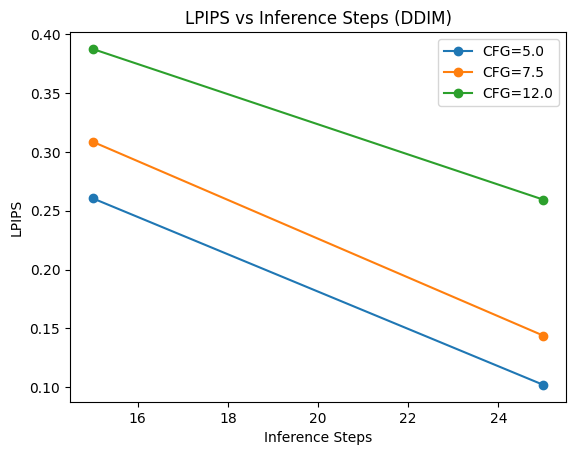

In [ ]:
import matplotlib.pyplot as plt


mean_lpips = (
    df_lpips_steps
    .groupby("guidance")[["lpips_10_to_20", "lpips_20_to_30"]]
    .mean()
    .reset_index()
)

x = [15, 25]

plt.figure()
for _, row in mean_lpips.iterrows():
    plt.plot(
        x,
        [row["lpips_10_to_20"], row["lpips_20_to_30"]],
        marker="o",
        label=f"CFG={row['guidance']}"
    )

plt.xlabel("Inference Steps")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Inference Steps (DDIM)")
plt.legend()
plt.show()


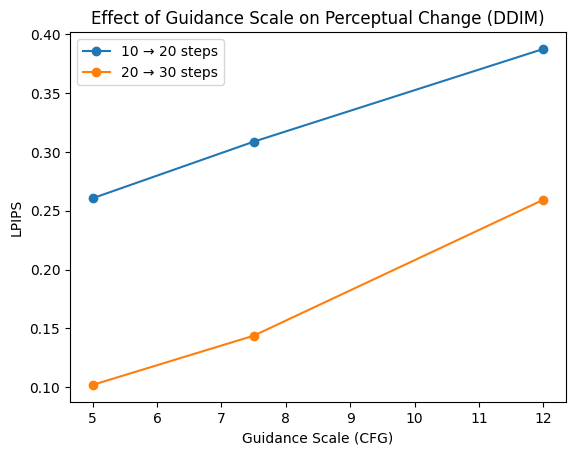

In [ ]:
plt.figure()

plt.plot(
    mean_lpips["guidance"],
    mean_lpips["lpips_10_to_20"],
    marker="o",
    label="10 → 20 steps"
)

plt.plot(
    mean_lpips["guidance"],
    mean_lpips["lpips_20_to_30"],
    marker="o",
    label="20 → 30 steps"
)

plt.xlabel("Guidance Scale (CFG)")
plt.ylabel("LPIPS")
plt.title("Effect of Guidance Scale on Perceptual Change (DDIM)")
plt.legend()
plt.show()


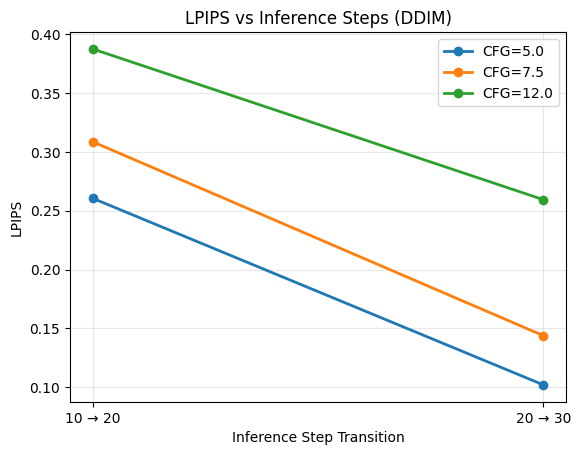

In [ ]:
import matplotlib.pyplot as plt


mean_lpips = (
    df_lpips_steps
    .groupby("guidance")[["lpips_10_to_20", "lpips_20_to_30"]]
    .mean()
    .reset_index()
)

x = [15, 25]

plt.figure()

for _, row in mean_lpips.iterrows():
    plt.plot(
        x,
        [row["lpips_10_to_20"], row["lpips_20_to_30"]],
        marker="o",
        linewidth=2,
        markersize=6,
        label=f"CFG={row['guidance']}"
    )

plt.xticks([15, 25], ["10 → 20", "20 → 30"])
plt.xlabel("Inference Step Transition")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Inference Steps (DDIM)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import pandas as pd

df_clip = pd.read_csv("/content/results_run1.csv")
df_clip.head()


sampler  steps  guidance  clipscore
0    ddim     10       5.0   0.315909
1    ddim     10       7.5   0.317118
2    ddim     10      12.0   0.317957
3    ddim     20       5.0   0.314109
4    ddim     20       7.5   0.316684

In [ ]:
df_clip.columns


Index(['sampler', 'steps', 'guidance', 'clipscore'], dtype='object')

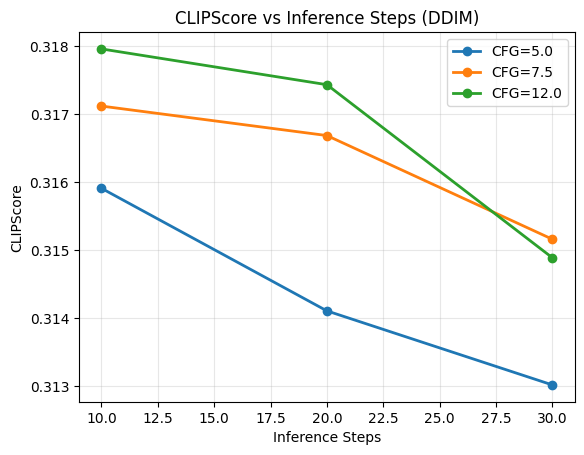

In [ ]:
import matplotlib.pyplot as plt

# κράτα μόνο DDIM (αν έχεις κι άλλους samplers)
df_ddim = df_clip[df_clip["sampler"] == "ddim"]

mean_clip = (
    df_ddim
    .groupby(["steps", "guidance"])["clipscore"]
    .mean()
    .reset_index()
)

plt.figure()

for g in sorted(mean_clip["guidance"].unique()):
    sub = mean_clip[mean_clip["guidance"] == g]
    plt.plot(
        sub["steps"],
        sub["clipscore"],
        marker="o",
        linewidth=2,
        markersize=6,
        label=f"CFG={g}"
    )

plt.xlabel("Inference Steps")
plt.ylabel("CLIPScore")
plt.title("CLIPScore vs Inference Steps (DDIM)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


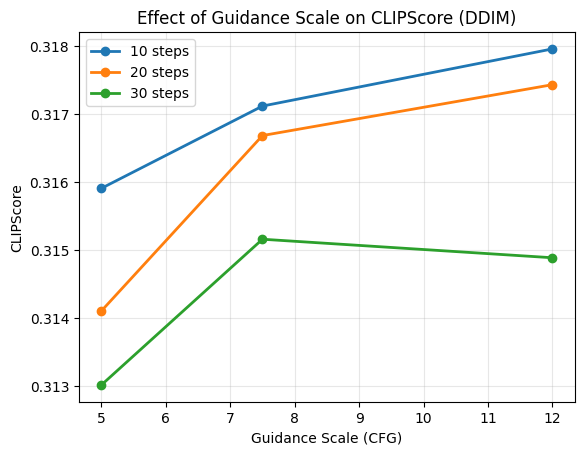

In [ ]:
mean_clip_g = (
    df_ddim
    .groupby(["guidance", "steps"])["clipscore"]
    .mean()
    .reset_index()
)

plt.figure()

for s in sorted(mean_clip_g["steps"].unique()):
    sub = mean_clip_g[mean_clip_g["steps"] == s]
    plt.plot(
        sub["guidance"],
        sub["clipscore"],
        marker="o",
        linewidth=2,
        markersize=6,
        label=f"{s} steps"
    )

plt.xlabel("Guidance Scale (CFG)")
plt.ylabel("CLIPScore")
plt.title("Effect of Guidance Scale on CLIPScore (DDIM)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
!pip install open-clip-torch torch torchvision pillow tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 0.6.13
    Uninstalling timm-0.6.13:
      Successfully uninstalled timm-0.6.13


In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

def clip_embed(img):
    img_t = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        emb = clip_model.encode_image(img_t)
        emb = emb / emb.norm(dim=-1, keepdim=True)
    return emb

rows = []

for g in [5.0, 7.5, 12.0]:
    for i in tqdm(range(len(prompts)), desc=f"CFG={g}"):

        p20 = f"/content/generated/RUN1_ddim_s20_g{g}/{i}.png"
        p30 = f"/content/generated/RUN1_ddim_s30_g{g}/{i}.png"

        if not (os.path.exists(p20) and os.path.exists(p30)):
            continue

        img20 = Image.open(p20).convert("RGB")
        img30 = Image.open(p30).convert("RGB")

        e20 = clip_embed(img20)
        e30 = clip_embed(img30)

        sim = F.cosine_similarity(e20, e30).item()

        rows.append({
            "sampler": "ddim",
            "guidance": g,
            "clip_image_similarity_20_30": sim
        })

df_clip_sim = pd.DataFrame(rows)
df_clip_sim.to_csv("/content/clip_image_similarity.csv", index=False)

df_clip_sim.head()


CFG=12.0: 100%|██████████| 50/50 [00:09<00:00,  5.10it/s]


sampler  guidance  clip_image_similarity_20_30
0    ddim       5.0                     0.860062
1    ddim       5.0                     0.873159
2    ddim       5.0                     0.965975
3    ddim       5.0                     0.973585
4    ddim       5.0                     0.939867

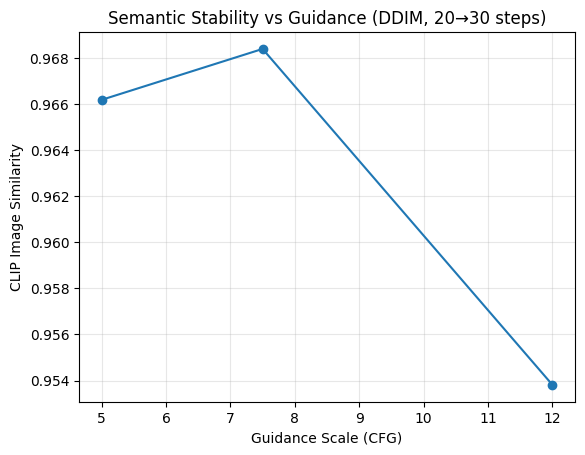

In [ ]:
import matplotlib.pyplot as plt

mean_sim = (
    df_clip_sim
    .groupby("guidance")["clip_image_similarity_20_30"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(
    mean_sim["guidance"],
    mean_sim["clip_image_similarity_20_30"],
    marker="o"
)
plt.xlabel("Guidance Scale (CFG)")
plt.ylabel("CLIP Image Similarity")
plt.title("Semantic Stability vs Guidance (DDIM, 20→30 steps)")
plt.grid(True, alpha=0.3)
plt.show()


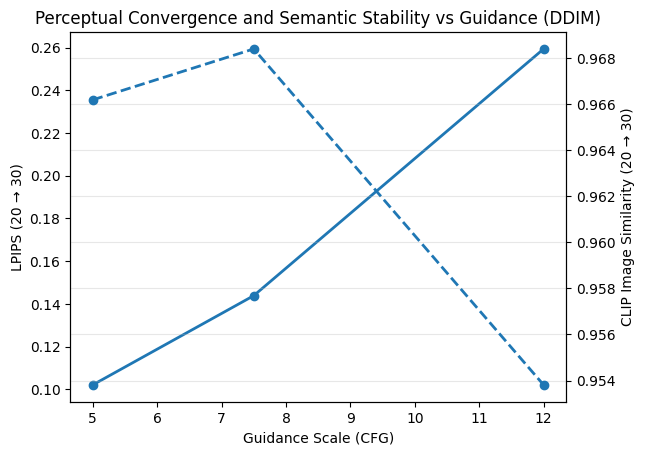

In [ ]:
import matplotlib.pyplot as plt


lpips_mean = (
    df_lpips_steps
    .groupby("guidance")["lpips_20_to_30"]
    .mean()
    .reset_index()
)


clip_sim_mean = (
    df_clip_sim
    .groupby("guidance")["clip_image_similarity_20_30"]
    .mean()
    .reset_index()
)


fig, ax1 = plt.subplots()


ax1.plot(
    lpips_mean["guidance"],
    lpips_mean["lpips_20_to_30"],
    marker="o",
    linewidth=2
)
ax1.set_xlabel("Guidance Scale (CFG)")
ax1.set_ylabel("LPIPS (20 → 30)")


ax2 = ax1.twinx()
ax2.plot(
    clip_sim_mean["guidance"],
    clip_sim_mean["clip_image_similarity_20_30"],
    marker="o",
    linestyle="--",
    linewidth=2
)
ax2.set_ylabel("CLIP Image Similarity (20 → 30)")

plt.title("Perceptual Convergence and Semantic Stability vs Guidance (DDIM)")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm

def clip_embed(img):
    img_t = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        emb = clip_model.encode_image(img_t)
        emb = emb / emb.norm(dim=-1, keepdim=True)
    return emb

rows_10_20 = []

for g in [5.0, 7.5, 12.0]:
    for i in tqdm(range(len(prompts)), desc=f"10→20 CFG={g}"):
        p10 = f"/content/generated/RUN1_ddim_s10_g{g}/{i}.png"
        p20 = f"/content/generated/RUN1_ddim_s20_g{g}/{i}.png"
        if not (os.path.exists(p10) and os.path.exists(p20)):
            continue

        e10 = clip_embed(Image.open(p10).convert("RGB"))
        e20 = clip_embed(Image.open(p20).convert("RGB"))
        sim = F.cosine_similarity(e10, e20).item()

        rows_10_20.append({
            "guidance": g,
            "clip_image_similarity_10_20": sim
        })

df_clip_sim_10_20 = pd.DataFrame(rows_10_20)


10→20 CFG=12.0: 100%|██████████| 50/50 [00:08<00:00,  5.95it/s]


In [ ]:
# LPIPS means
lpips_means = (
    df_lpips_steps
    .groupby("guidance")[["lpips_10_to_20", "lpips_20_to_30"]]
    .mean()
    .reset_index()
)

# CLIP similarity means
clip_sim_10_20 = (
    df_clip_sim_10_20
    .groupby("guidance")["clip_image_similarity_10_20"]
    .mean()
    .reset_index()
)

clip_sim_20_30 = (
    df_clip_sim
    .groupby("guidance")["clip_image_similarity_20_30"]
    .mean()
    .reset_index()
)


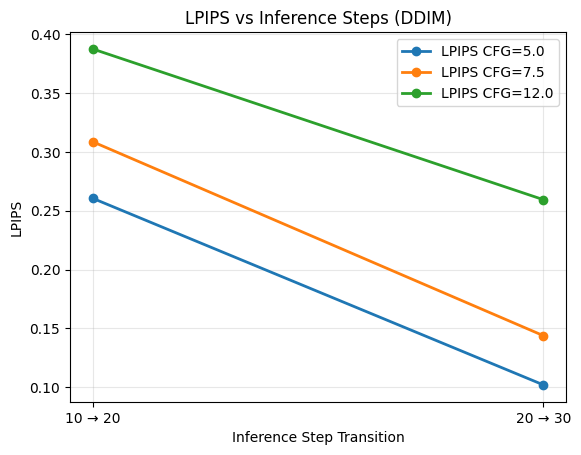

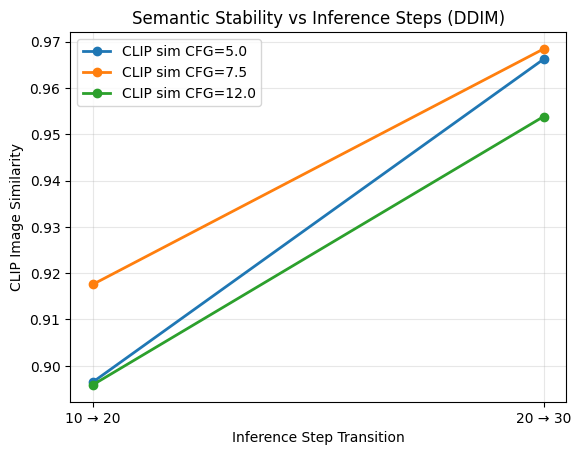

In [ ]:
import matplotlib.pyplot as plt

x = [15, 25]


plt.figure()

for g in [5.0, 7.5, 12.0]:

    y_lpips = [
        lpips_means.loc[lpips_means.guidance==g, "lpips_10_to_20"].values[0],
        lpips_means.loc[lpips_means.guidance==g, "lpips_20_to_30"].values[0],
    ]
    plt.plot(x, y_lpips, marker="o", linewidth=2, label=f"LPIPS CFG={g}")

plt.xlabel("Inference Step Transition")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Inference Steps (DDIM)")
plt.xticks([15, 25], ["10 → 20", "20 → 30"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


plt.figure()
for g in [5.0, 7.5, 12.0]:
    y_sim = [
        clip_sim_10_20.loc[clip_sim_10_20.guidance==g, "clip_image_similarity_10_20"].values[0],
        clip_sim_20_30.loc[clip_sim_20_30.guidance==g, "clip_image_similarity_20_30"].values[0],
    ]
    plt.plot(x, y_sim, marker="o", linewidth=2, label=f"CLIP sim CFG={g}")

plt.xlabel("Inference Step Transition")
plt.ylabel("CLIP Image Similarity")
plt.title("Semantic Stability vs Inference Steps (DDIM)")
plt.xticks([15, 25], ["10 → 20", "20 → 30"])
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


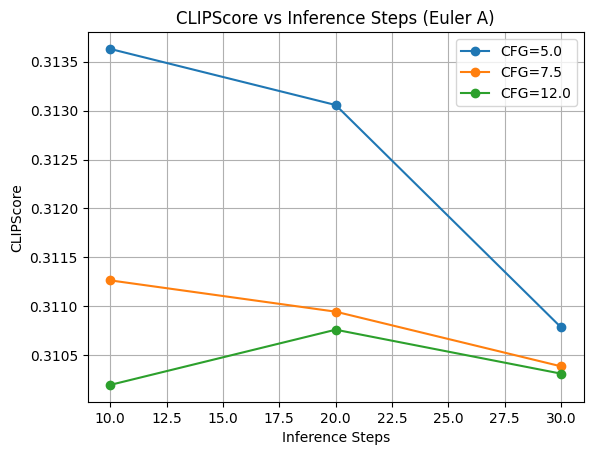

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results_run1_euler_a.csv")

plt.figure()
for cfg in [5.0, 7.5, 12.0]:
    sub = df[df["guidance"] == cfg].sort_values("steps")
    plt.plot(sub["steps"], sub["clipscore"], marker="o", label=f"CFG={cfg}")

plt.xlabel("Inference Steps")
plt.ylabel("CLIPScore")
plt.title("CLIPScore vs Inference Steps (Euler A)")
plt.legend()
plt.grid(True)
plt.show()


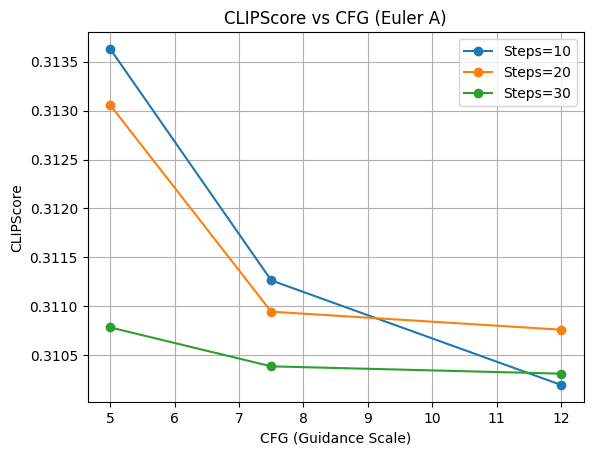

In [ ]:
plt.figure()
for steps in [10, 20, 30]:
    sub = df[df["steps"] == steps].sort_values("guidance")
    plt.plot(sub["guidance"], sub["clipscore"], marker="o", label=f"Steps={steps}")

plt.xlabel("CFG (Guidance Scale)")
plt.ylabel("CLIPScore")
plt.title("CLIPScore vs CFG (Euler A)")
plt.legend()
plt.grid(True)
plt.show()


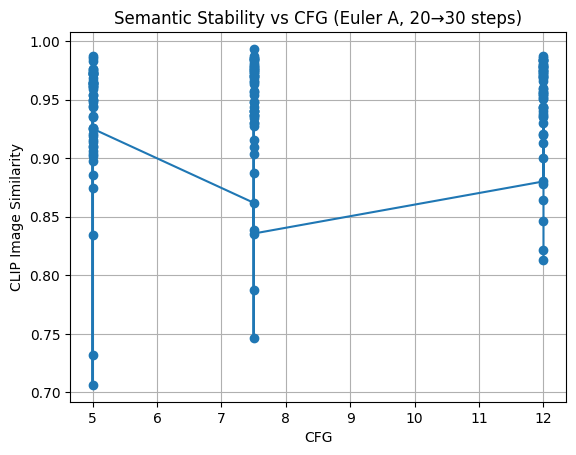

In [ ]:
df = pd.read_csv("clip_image_similarity_euler_a.csv")

plt.figure()
plt.plot(df["guidance"], df["clip_image_similarity_20_30"], marker="o")
plt.xlabel("CFG")
plt.ylabel("CLIP Image Similarity")
plt.title("Semantic Stability vs CFG (Euler A, 20→30 steps)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("clip_image_similarity_euler_a.csv")
print(df.columns)


Index(['sampler', 'guidance', 'clip_image_similarity_20_30'], dtype='object')


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def ensure_cols(df):
    return df.rename(columns={"guidance":"cfg", "guidance_scale":"cfg", "CFG":"cfg"})

def plot_clipscore(results_csv, outdir, sampler_title):
    df = ensure_cols(pd.read_csv(results_csv))
    os.makedirs(outdir, exist_ok=True)


    plt.figure()
    for cfg in sorted(df["cfg"].unique()):
        sub = df[df["cfg"]==cfg].sort_values("steps")
        plt.plot(sub["steps"], sub["clipscore"], marker="o", label=f"CFG={cfg}")
    plt.xlabel("Inference Steps")
    plt.ylabel("CLIPScore")
    plt.title(f"CLIPScore vs Steps ({sampler_title})")
    plt.grid(True); plt.legend()
    plt.savefig(f"{outdir}/clipscore_vs_steps.png", dpi=300, bbox_inches="tight")
    plt.close()


    plt.figure()
    for steps in sorted(df["steps"].unique()):
        sub = df[df["steps"]==steps].sort_values("cfg")
        plt.plot(sub["cfg"], sub["clipscore"], marker="o", label=f"Steps={steps}")
    plt.xlabel("CFG (Guidance Scale)")
    plt.ylabel("CLIPScore")
    plt.title(f"CLIPScore vs CFG ({sampler_title})")
    plt.grid(True); plt.legend()
    plt.savefig(f"{outdir}/clipscore_vs_cfg.png", dpi=300, bbox_inches="tight")
    plt.close()

def plot_transitions(trans_steps_csv, trans_cfg_csv, outdir, sampler_title, metric_name="LPIPS"):
    os.makedirs(outdir, exist_ok=True)

    dfS = ensure_cols(pd.read_csv(trans_steps_csv))
    plt.figure()
    for cfg in sorted(dfS["cfg"].unique()):
        row = dfS[dfS["cfg"]==cfg].iloc[0]
        plt.plot(["10→20","20→30"], [row["metric_10_20"], row["metric_20_30"]],
                 marker="o", label=f"CFG={cfg}")
    plt.xlabel("Inference Step Transition")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} vs Steps Transition ({sampler_title})")
    plt.grid(True); plt.legend()
    plt.savefig(f"{outdir}/{metric_name.lower()}_vs_steps_transition.png", dpi=300, bbox_inches="tight")
    plt.close()


    dfC = ensure_cols(pd.read_csv(trans_cfg_csv))
    plt.figure()
    for steps in sorted(dfC["steps"].unique()):
        row = dfC[dfC["steps"]==steps].iloc[0]
        plt.plot(["5→7.5","7.5→12"], [row["metric_5_7_5"], row["metric_7_5_12"]],
                 marker="o", label=f"Steps={steps}")
    plt.xlabel("CFG Transition")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} vs CFG Transition ({sampler_title})")
    plt.grid(True); plt.legend()
    plt.savefig(f"{outdir}/{metric_name.lower()}_vs_cfg_transition.png", dpi=300, bbox_inches="tight")
    plt.close()


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("newresults_run1.csv")
print(df.columns)


Index(['sampler', 'steps', 'guidance', 'clipscore'], dtype='object')


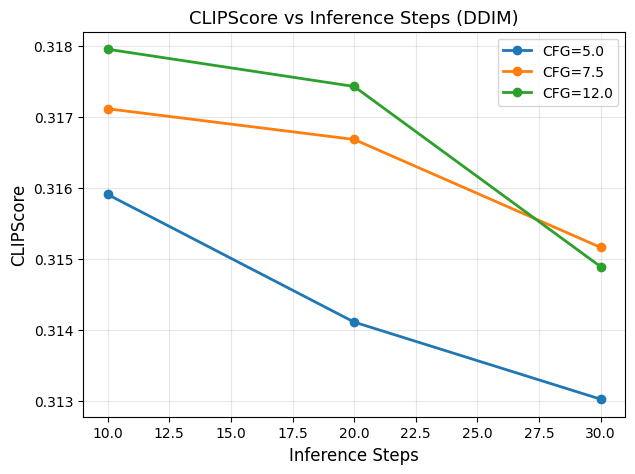

In [ ]:
plt.figure(figsize=(7,5))

for cfg in sorted(df["guidance"].unique()):
    sub = df[df["guidance"] == cfg].sort_values("steps")
    plt.plot(
        sub["steps"],
        sub["clipscore"],
        marker="o",
        linewidth=2,
        label=f"CFG={cfg}"
    )

plt.xlabel("Inference Steps", fontsize=12)
plt.ylabel("CLIPScore", fontsize=12)
plt.title("CLIPScore vs Inference Steps (DDIM)", fontsize=13)

plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


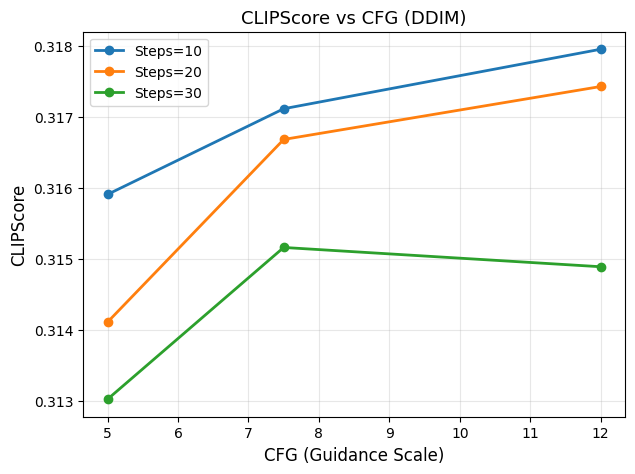

In [ ]:
plt.figure(figsize=(7,5))

for steps in sorted(df["steps"].unique()):
    sub = df[df["steps"] == steps].sort_values("guidance")
    plt.plot(
        sub["guidance"],
        sub["clipscore"],
        marker="o",
        linewidth=2,
        label=f"Steps={steps}"
    )

plt.xlabel("CFG (Guidance Scale)", fontsize=12)
plt.ylabel("CLIPScore", fontsize=12)
plt.title("CLIPScore vs CFG (DDIM)", fontsize=13)

plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("lpips_steps.csv")
print(df.columns)


Index(['sampler', 'guidance', 'lpips_10_to_20', 'lpips_20_to_30'], dtype='object')


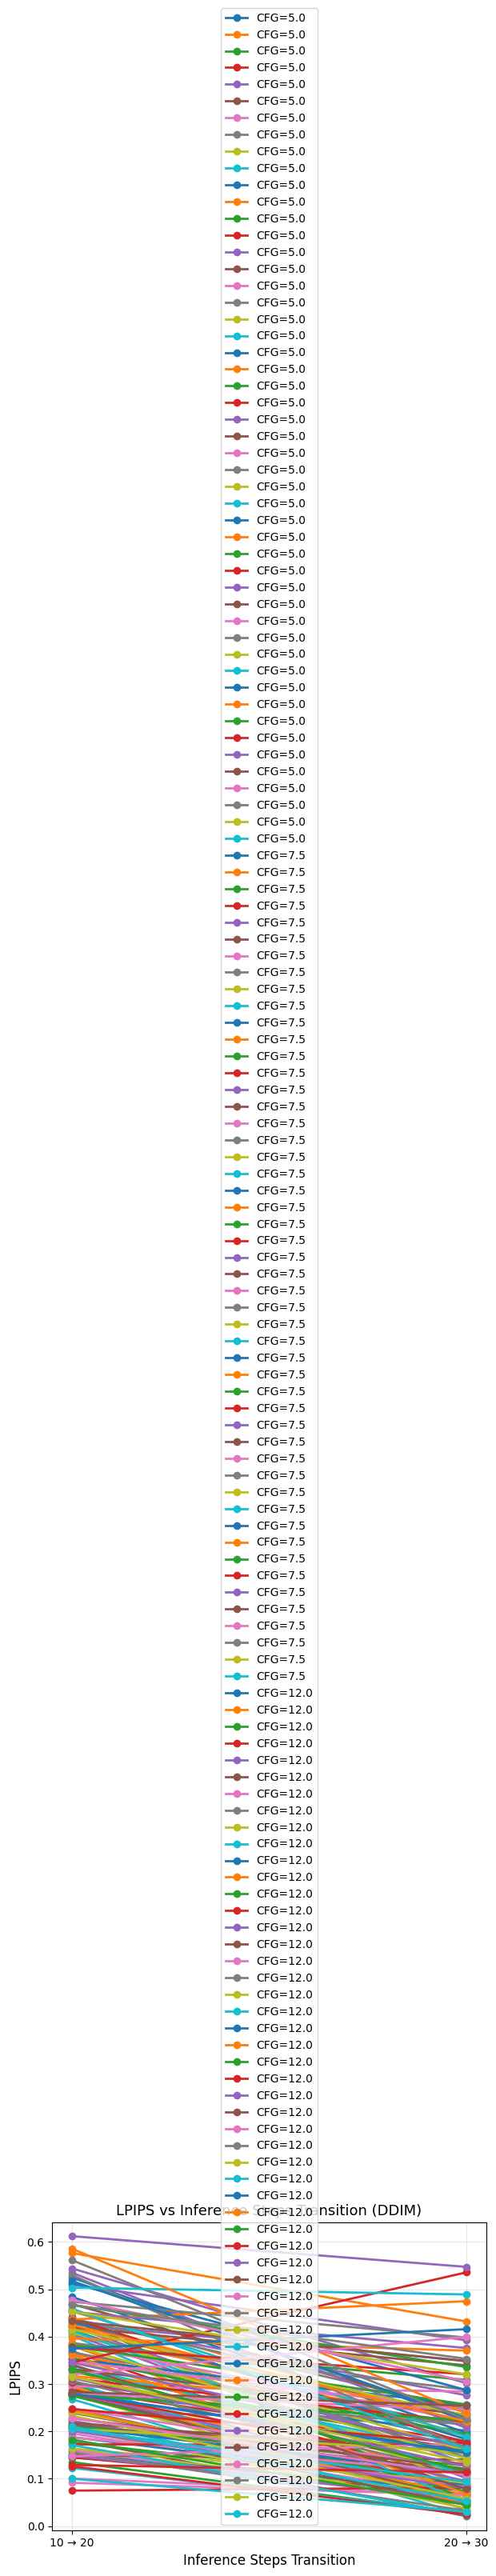

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df.sort_values("guidance").iterrows():
    plt.plot(
        ["10 → 20", "20 → 30"],
        [row["lpips_10_to_20"], row["lpips_20_to_30"]],
        marker="o",
        linewidth=2,
        label=f"CFG={row['guidance']}"
    )

plt.xlabel("Inference Steps Transition", fontsize=12)
plt.ylabel("LPIPS", fontsize=12)
plt.title("LPIPS vs Inference Steps Transition (DDIM)", fontsize=13)

plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


In [ ]:


df_mean = (
    df
    .groupby("guidance")[["lpips_10_to_20", "lpips_20_to_30"]]
    .mean()
    .reset_index()
)


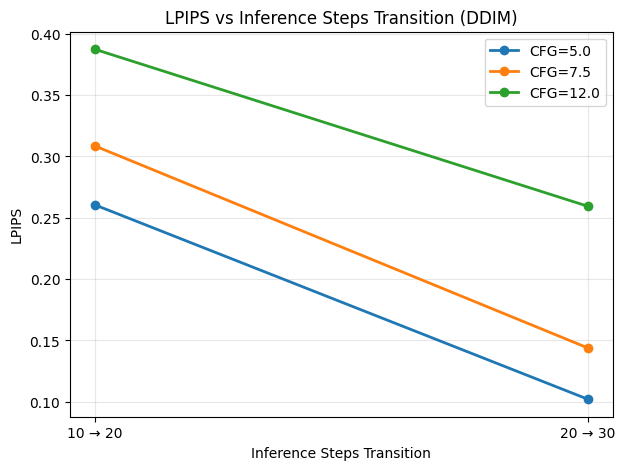

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

for _, row in df_mean.sort_values("guidance").iterrows():
    plt.plot(
        ["10 → 20", "20 → 30"],
        [row["lpips_10_to_20"], row["lpips_20_to_30"]],
        marker="o",
        linewidth=2,
        label=f"CFG={row['guidance']}"
    )

plt.xlabel("Inference Steps Transition")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Inference Steps Transition (DDIM)")
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("lpips_cfg.csv")
print(df.columns)


Index(['sampler', 'steps', 'lpips_cfg_5_to_7_5', 'lpips_cfg_7_5_to_12'], dtype='object')


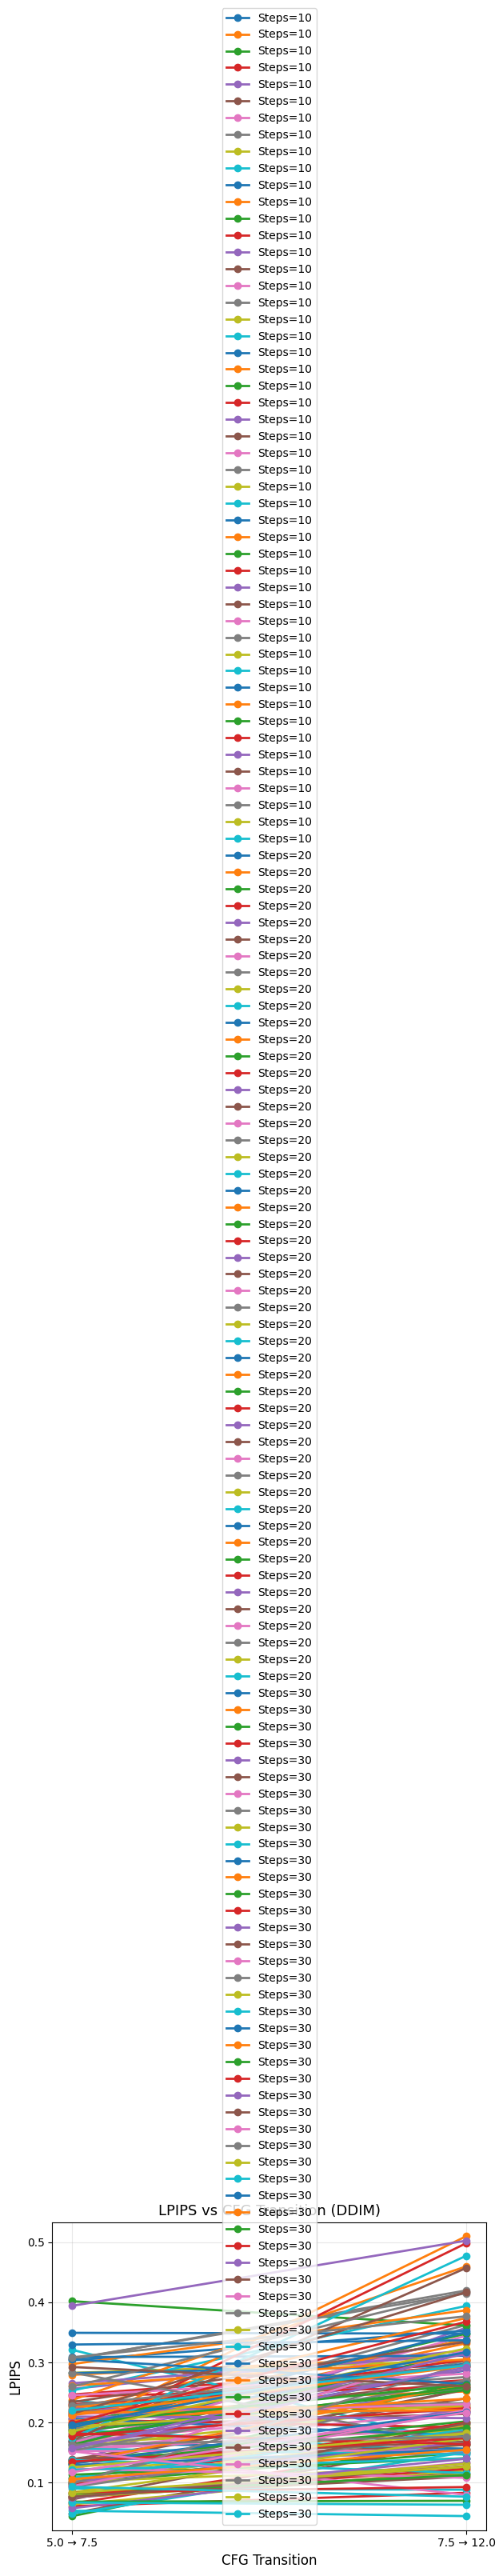

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df.sort_values("steps").iterrows():
    plt.plot(
        ["5.0 → 7.5", "7.5 → 12.0"],
        [row["lpips_cfg_5_to_7_5"], row["lpips_cfg_7_5_to_12"]],
        marker="o",
        linewidth=2,
        label=f"Steps={row['steps']}"
    )

plt.xlabel("CFG Transition", fontsize=12)
plt.ylabel("LPIPS", fontsize=12)
plt.title("LPIPS vs CFG Transition (DDIM)", fontsize=13)

plt.grid(True, alpha=0.3)
plt.legend()

plt.show()   # 👈 ΑΠΑΡΑΙΤΗΤΟ


In [ ]:
df_mean = (
    df
    .groupby("steps")[["lpips_cfg_5_to_7_5", "lpips_cfg_7_5_to_12"]]
    .mean()
    .reset_index()
)


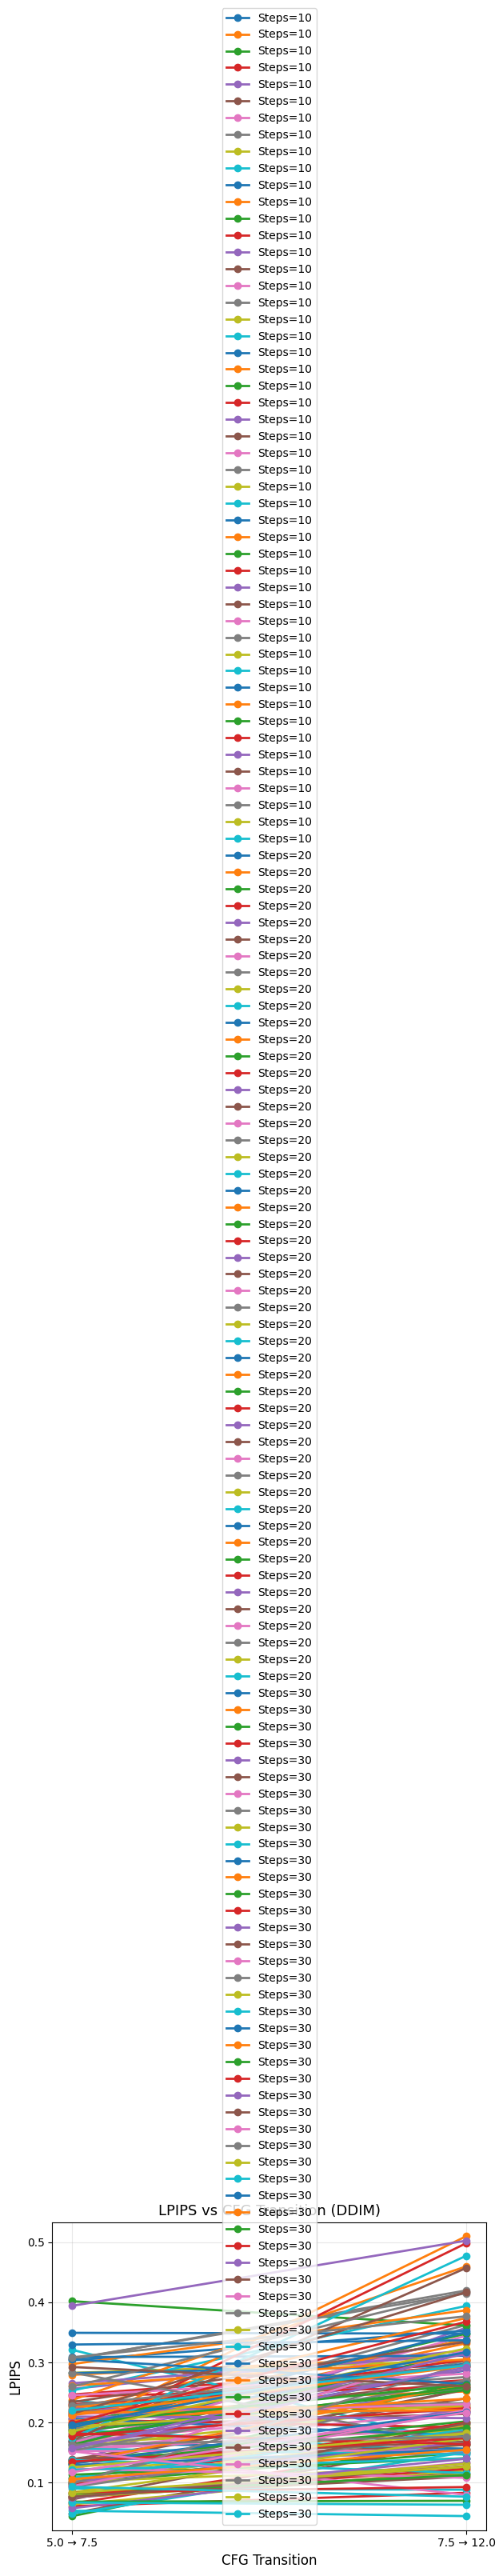

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df.sort_values("steps").iterrows():
    plt.plot(
        ["5.0 → 7.5", "7.5 → 12.0"],
        [row["lpips_cfg_5_to_7_5"], row["lpips_cfg_7_5_to_12"]],
        marker="o",
        linewidth=2,
        label=f"Steps={row['steps']}"
    )

plt.xlabel("CFG Transition", fontsize=12)
plt.ylabel("LPIPS", fontsize=12)
plt.title("LPIPS vs CFG Transition (DDIM)", fontsize=13)

plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

In [ ]:
print(df_mean)


   steps  lpips_cfg_5_to_7_5  lpips_cfg_7_5_to_12
0     10            0.180624             0.256081
1     20            0.168957             0.251508
2     30            0.161599             0.212291


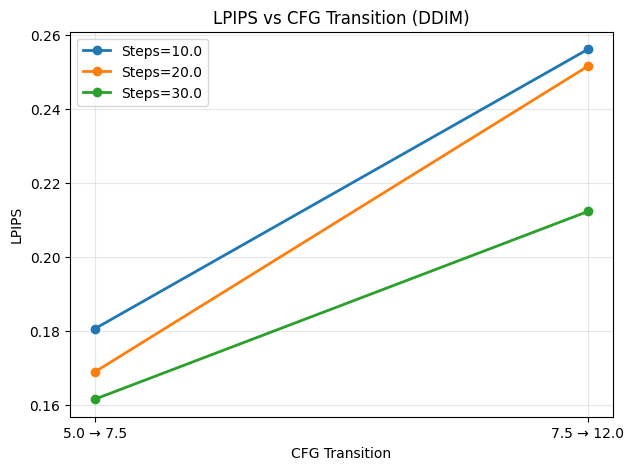

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df_mean.sort_values("steps").iterrows():
    plt.plot(
        ["5.0 → 7.5", "7.5 → 12.0"],
        [row["lpips_cfg_5_to_7_5"], row["lpips_cfg_7_5_to_12"]],
        marker="o",
        linewidth=2,
        label=f"Steps={row['steps']}"
    )

plt.xlabel("CFG Transition")
plt.ylabel("LPIPS")
plt.title("LPIPS vs CFG Transition (DDIM)")
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("clip_image_similarity.csv")
print(df.columns)


Index(['sampler', 'guidance', 'clip_image_similarity_20_30'], dtype='object')


In [ ]:
df.groupby("guidance").size()


guidance
5.0     50
7.5     50
12.0    50
dtype: int64

In [ ]:
df_mean = (
    df
    .groupby("guidance")[[ "clip_image_similarity_20_30"]]
    .mean()
    .reset_index()
)


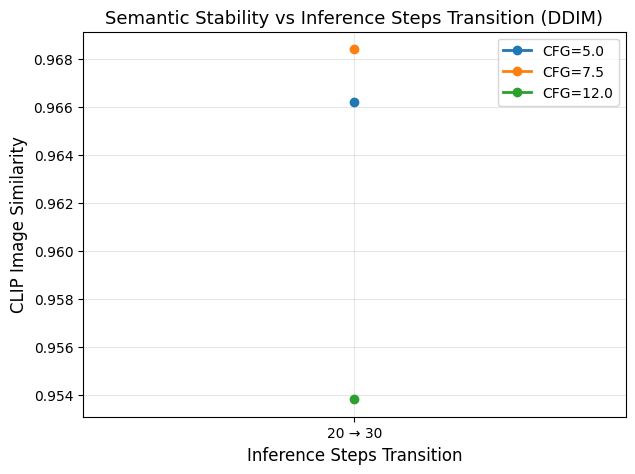

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df_mean.sort_values("guidance").iterrows():
    plt.plot(
        ["20 → 30"],
        [ row["clip_image_similarity_20_30"]],
        marker="o",
        linewidth=2,
        label=f"CFG={row['guidance']}"
    )

plt.xlabel("Inference Steps Transition", fontsize=12)
plt.ylabel("CLIP Image Similarity", fontsize=12)
plt.title("Semantic Stability vs Inference Steps Transition (DDIM)", fontsize=13)

plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


In [ ]:
df = pd.read_csv("lpips_cfg.csv")
print(df.columns)


Index(['sampler', 'steps', 'lpips_cfg_5_to_7_5', 'lpips_cfg_7_5_to_12'], dtype='object')


In [ ]:
df_mean = (
    df
    .groupby("steps")[["lpips_cfg_5_to_7_5", "lpips_cfg_7_5_to_12"]]
    .mean()
    .reset_index()
)


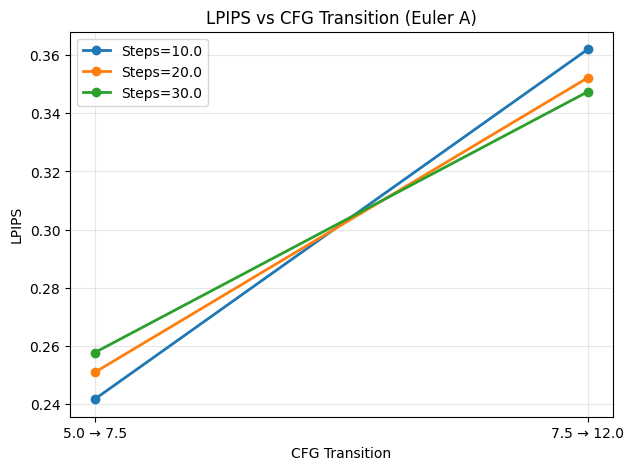

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df_mean.sort_values("steps").iterrows():
    plt.plot(
        ["5.0 → 7.5", "7.5 → 12.0"],
        [row["lpips_cfg_5_to_7_5"], row["lpips_cfg_7_5_to_12"]],
        marker="o",
        linewidth=2,
        label=f"Steps={row['steps']}"
    )

plt.xlabel("CFG Transition")
plt.ylabel("LPIPS")
plt.title("LPIPS vs CFG Transition (Euler A)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv("clip_image_similarity_euler_a.csv")
print(df.columns)


Index(['sampler', 'guidance', 'clip_image_similarity_20_30'], dtype='object')


In [ ]:
df_mean = (
    df
    .groupby("guidance")[["clip_image_similarity_20_30"]]
    .mean()
    .reset_index()
)


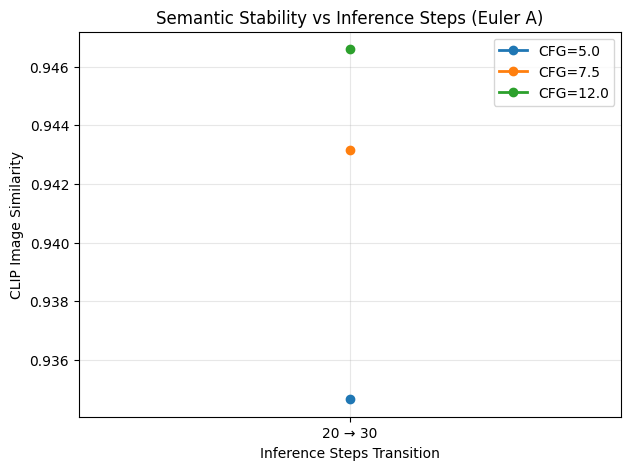

In [ ]:
plt.figure(figsize=(7,5))

for _, row in df_mean.sort_values("guidance").iterrows():
    plt.plot(
        ["20 → 30"],
        [ row["clip_image_similarity_20_30"]],
        marker="o",
        linewidth=2,
        label=f"CFG={row['guidance']}"
    )

plt.xlabel("Inference Steps Transition")
plt.ylabel("CLIP Image Similarity")
plt.title("Semantic Stability vs Inference Steps (Euler A)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


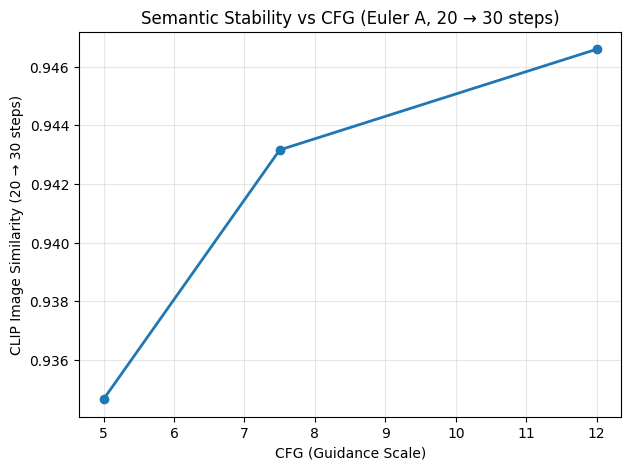

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("clip_image_similarity_euler_a.csv")

# aggregation (αν έχει πολλά prompts)
df_mean = (
    df
    .groupby("guidance")["clip_image_similarity_20_30"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(7,5))
plt.plot(
    df_mean["guidance"],
    df_mean["clip_image_similarity_20_30"],
    marker="o",
    linewidth=2
)

plt.xlabel("CFG (Guidance Scale)")
plt.ylabel("CLIP Image Similarity (20 → 30 steps)")
plt.title("Semantic Stability vs CFG (Euler A, 20 → 30 steps)")
plt.grid(True, alpha=0.3)
plt.show()
